<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1,make_classification

In [265]:
#função para acessar os dados do exercício 1

def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

In [266]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [267]:
#função para acessar os dados do exercício 2

def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [268]:
X,y=getData()

In [269]:
X.shape, y.shape

((10000, 5), (10000,))

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
x=np.c_[np.ones((X.shape[0],1)),X]

In [272]:
x1=pd.DataFrame(x)

In [273]:
x1.head()

,0,1,2,3,4,5
0,1.0,0.548814,0.715189,0.602763,0.544883,0.423655
1,1.0,0.645894,0.437587,0.891773,0.963663,0.383442
2,1.0,0.791725,0.528895,0.568045,0.925597,0.071036
3,1.0,0.087129,0.020218,0.832620,0.778157,0.870012
4,1.0,0.978618,0.799159,0.461479,0.780529,0.118274


In [274]:
from sklearn.model_selection import KFold

In [275]:
kf=KFold(n_splits=5)
from sklearn.metrics import mean_squared_error

In [276]:
def funcao(x,learning_rate,num_steps):
  lista=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    lin_reg=regLinear(learning_rate,num_steps)
    lin_reg.fit(xtreino,ytreino)
    lista.append(mean_squared_error(ytreino,lin_reg.predict(xtreino)))
  print("Media MSE:  ",round(np.mean(lista),3))
  print()
  plt.figure(figsize=[20,8])
  plt.title("Valores MSE",fontsize=14)
  plt.scatter(range(len(lista)),lista)
  plt.plot(range(len(lista)),lista)
  plt.xlim(-1,5)
  plt.ylim(20,40)
  plt.xlabel("Número de iterações")
  plt.ylabel("MSE")
  plt.show

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.808



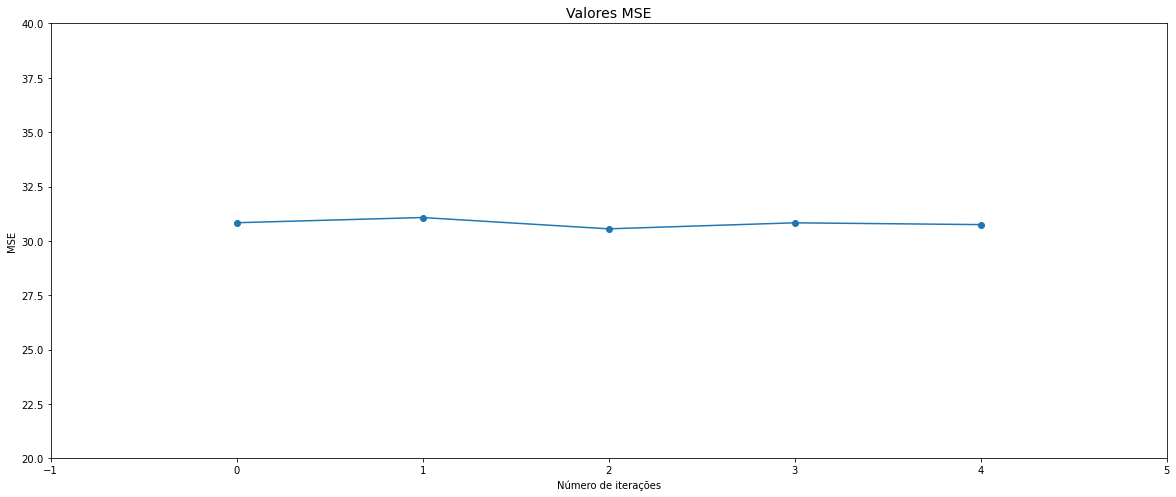

In [277]:
funcao(x,0.15,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   37.844



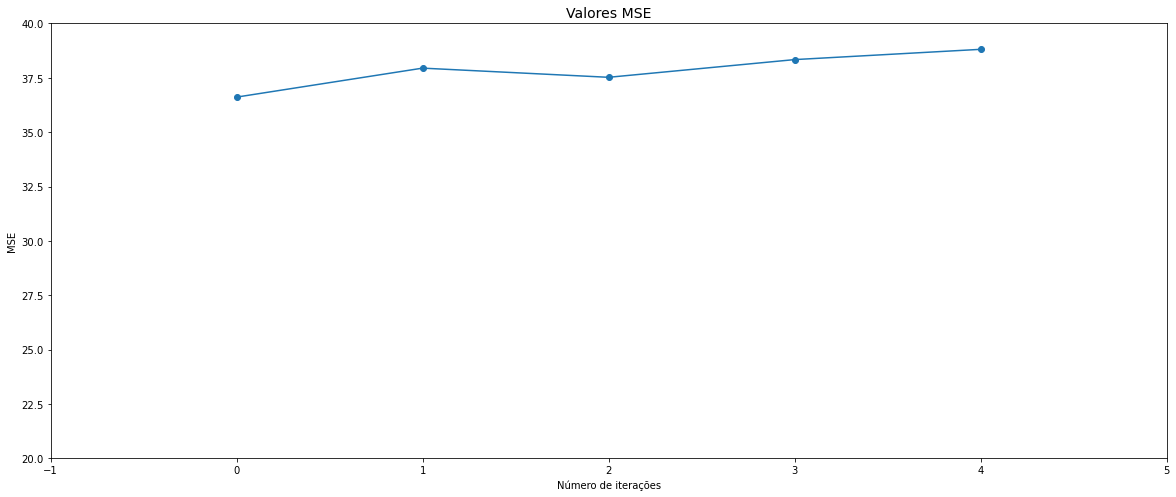

In [278]:
funcao(x,0.15,10)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   31.061



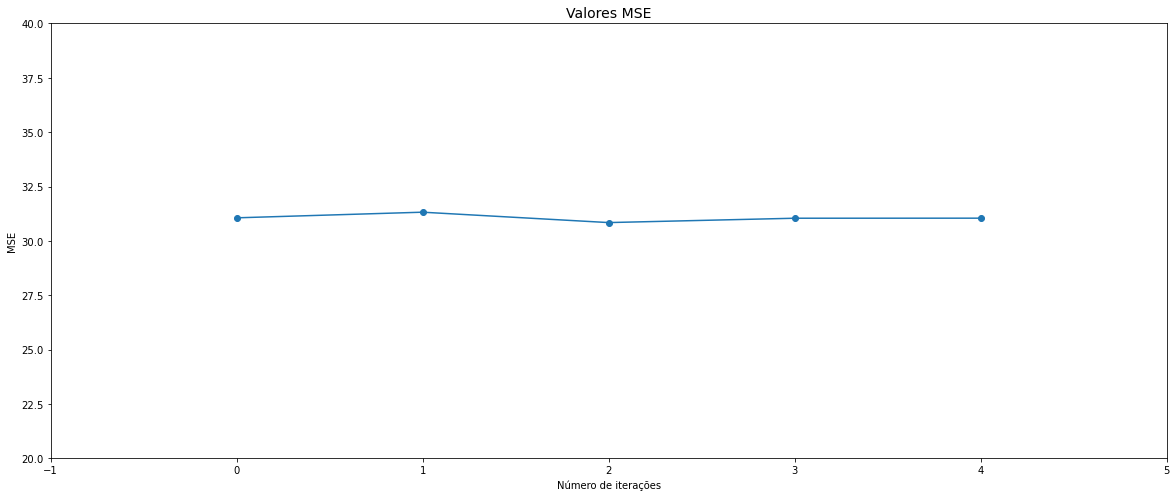

In [279]:
funcao(x,0.15,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   36.519



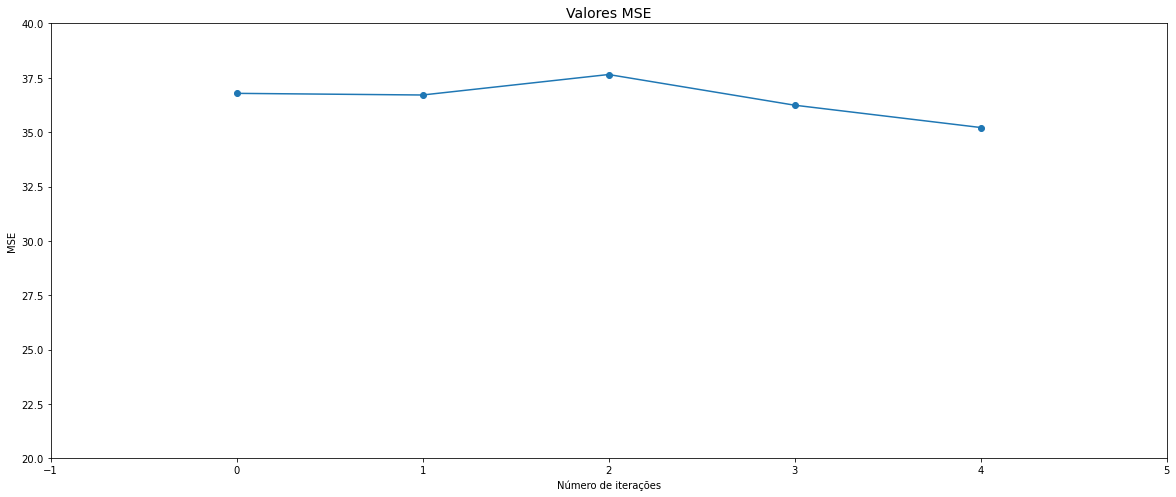

In [280]:
funcao(x,0.20,10)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.885



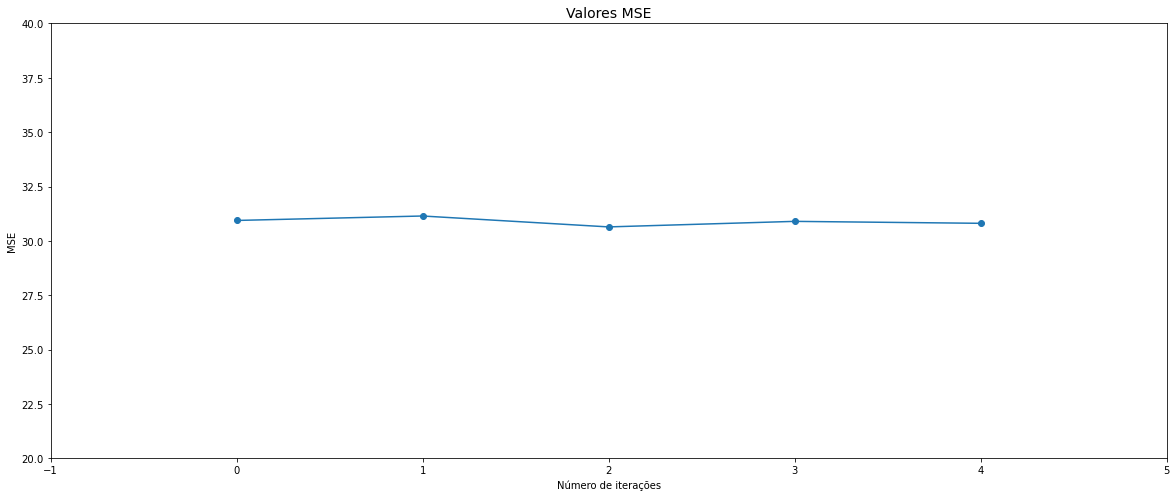

In [281]:
funcao(x,0.20,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.797



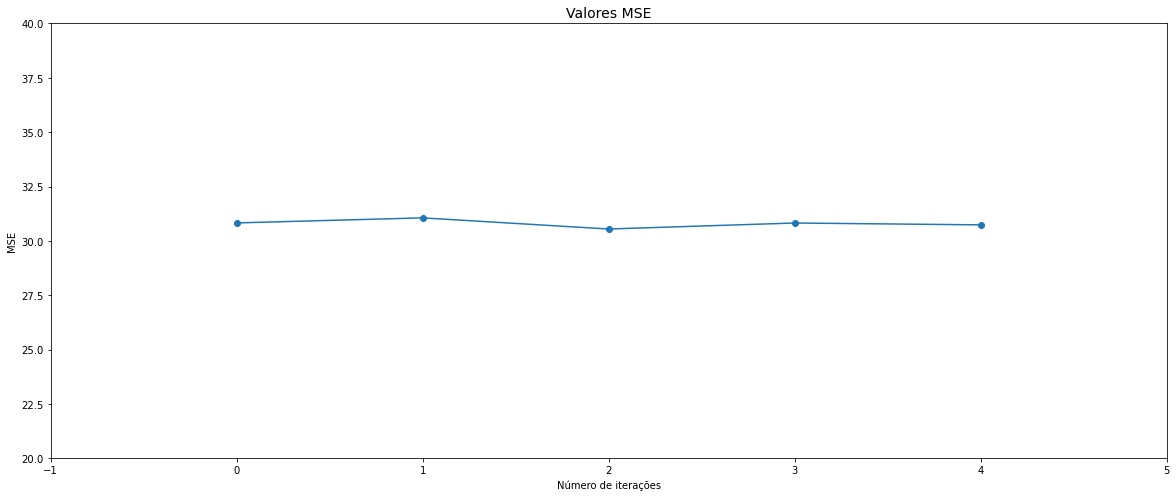

In [282]:
funcao(x,0.2,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.949



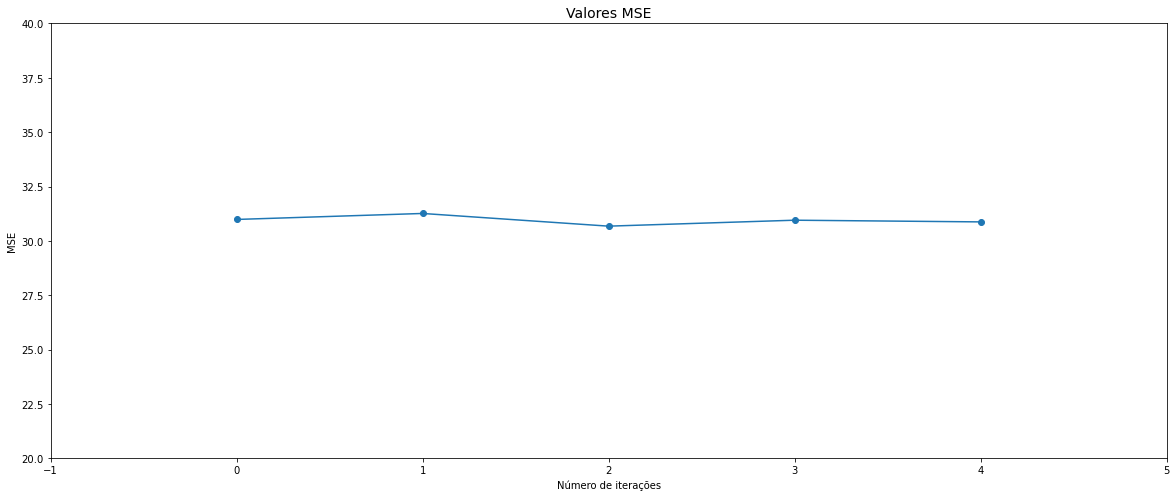

In [283]:
funcao(x,0.3,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.796



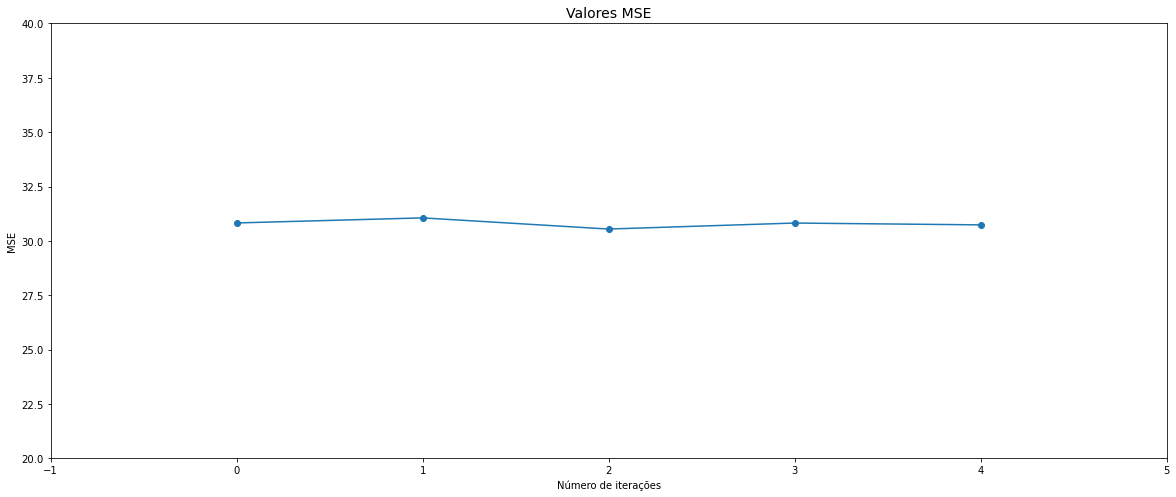

In [284]:
funcao(x,0.3,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.891



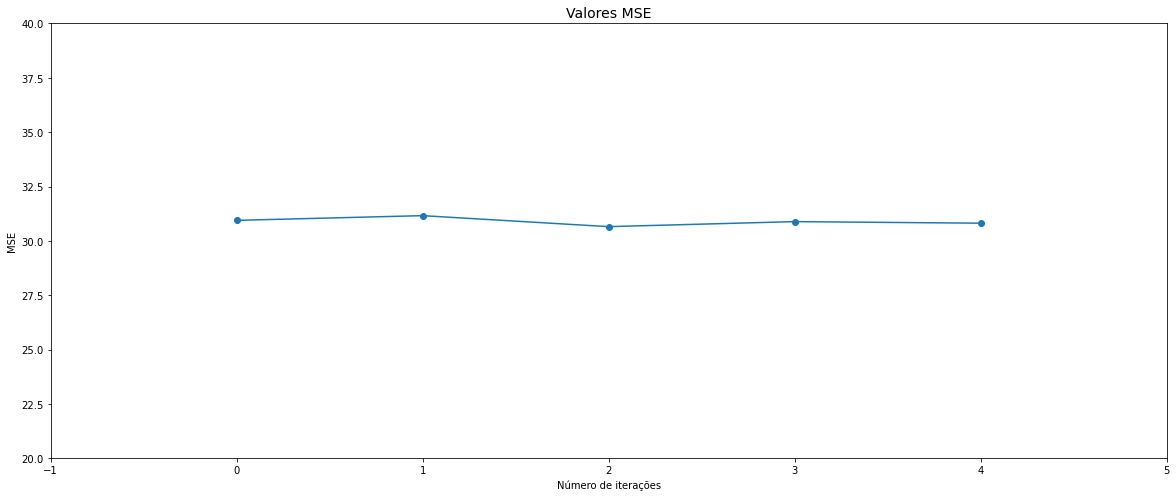

In [285]:
funcao(x,0.1,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   31.633



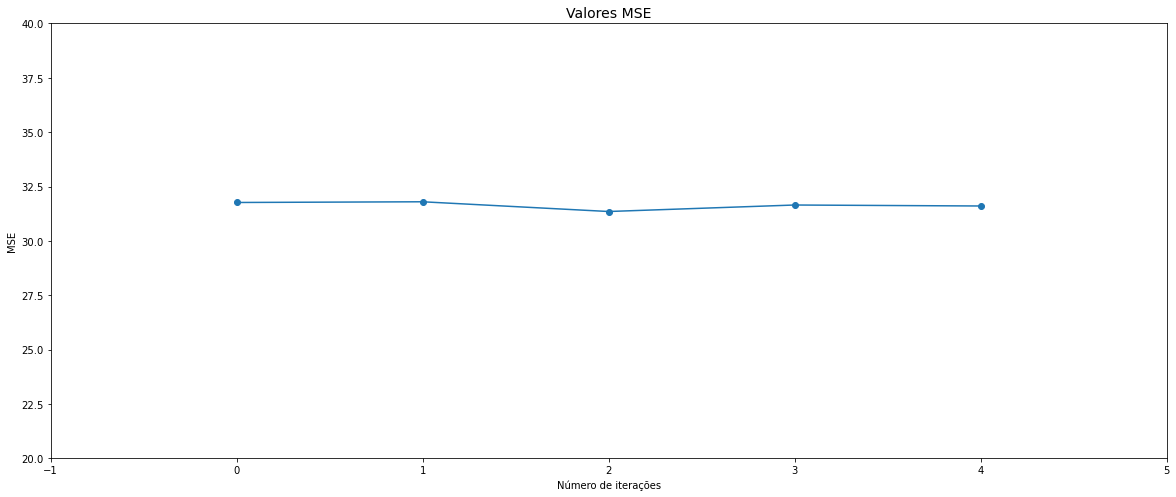

In [286]:
funcao(x,0.05,200)

# Ao final dos teste consegui identificar que os melhores parametros foram uma taxa de aprendizado de 0.2 com 200 passos apresentado um MSE médio de 30.795


```

```


---



In [287]:
from  sklearn.linear_model import LinearRegression

In [288]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [289]:
lr.intercept_, lr.coef_

(-0.05568613230241404,
 array([ 0.        ,  6.37661369,  7.0025    ,  0.21819147, 10.42594526,
         4.78517778]))

In [290]:
ypred=lr.predict(x)
mse=mean_squared_error(y,ypred)

print(mse)

30.80303834132047


In [291]:
x.shape, y.shape

((10000, 6), (10000,))

In [292]:
from sklearn.metrics import mean_squared_error

def MSE(ytrue, ypred):
    return mean_squared_error(y_true = ytrue, y_pred = ypred)

In [293]:
learning_rate = 0.075
num_steps = 200

m = x.shape[0] #qtd. linhas
k = x.shape[1] #qtd. colunas

theta = np.random.randn(k+1,1) # inicialização aleatórias dos parâmetros.
X_b = np.c_[np.ones((m, 1)), x] #colocando x0 = 1 em todas as instâncias de X

for step in range(num_steps):
    
    print('passo:', step)
    print('theta:', theta.reshape(-1,))
    
    #calcula o gradiente
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    
    #atualiza os valores de theta
    theta = theta - learning_rate * gradients
    
    
    #calculando o MSE dentro do passo:
    ypred_step = X_b.dot(theta)
    MSE_step = MSE(ytrue = y, ypred = ypred_step)
  
    print("MSE:", MSE_step)
    print('\n-----------------------------------------------------------\n') 

passo: 0
theta: [-1.21938542  0.4101931  -1.62361535  0.20516491 -0.86595279  0.03207966
  0.06535715]


ValueError: y_true and y_pred have different number of output (1!=10000)

In [294]:
regLinearEquacaoNormal(X, y)

NameError: name 'regLinearEquacaoNormal' is not defined

In [295]:
class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds

In [296]:
rg = regLinear(learning_rate = 0.075, num_steps = 200)

In [297]:
rg.fit(X, y)

modelo treinado.


In [298]:
rg.theta_final

array([[ 2.07617079],
       [ 5.47783917],
       [ 6.00003279],
       [-0.14625853],
       [ 9.16276669],
       [ 4.18747044]])

In [299]:
rg.predict(X)

array([[16.05216269],
       [18.54485013],
       [18.28190615],
       ...,
       [15.39827335],
       [17.4702556 ],
       [19.11676944]])

Comparando com o resultado da regressão linear do scikit-learn:

In [300]:
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_, lm.coef_)
print()
lm.predict(X)

-0.05568613230242292 [ 6.37661369  7.0025      0.21819147 10.42594526  4.78517778]



array([16.29170271, 19.20364386, 18.8105078 , ..., 15.3053878 ,
       17.95296077, 19.63525471])

__Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$


__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>



In [301]:
x1,y1=getData2()

In [302]:
from sklearn.preprocessing import PolynomialFeatures

In [303]:
lista=[0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15]
for i in lista:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lin_reg=regLinear(i,1000)
    lin_reg.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lin_reg.predict(xpol)))
  print("Media MSE com learning  rate  = ",i ,"\n" ,   round(np.mean(lista1),3))
  print()

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.07 
 28.283

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.08 
 28.092

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.09 
 27.936

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.1 
 27.744

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.12 
 27.444

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.13 
 27.445

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.14 
 27.311

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
mo

### Com o teste acima determinamos que a melhor learning rate se trata de 0.14, a partir disso realizarei outro loop alterando o número de passos.

In [304]:
step=[250,500,1000,1500,2000,5000]
for s in step:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lin_reg=regLinear(0.14,s)
    lin_reg.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lin_reg.predict(xpol)))
  print("Media MSE com numeros de passos  = ",s ,"\n" ,   round(np.mean(lista1),3))
  print()

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  250 
 29.522

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  500 
 28.321

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  1000 
 27.281

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  1500 
 26.901

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  2000 
 26.744

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  5000 
 26.633



### Vimos que com  5000 passos encontramos um Mse bem baixo, porém, irei escolher 2000 passos como parâmetro,pois não houve diferença significativa com o valor encontrado em 5000 passos.

### Portanto os parâmetros selecionados para regressão polinomial de grau 2 sera de 0.14 a taxa de aprendizado e 2000 passos.

In [305]:
lr_pol=LinearRegression()

In [306]:
xpol1=pol.fit_transform(x)

In [307]:
lr_pol.fit(xpol1,y)

LinearRegression()

In [308]:
mse_pol=mean_squared_error(y,lr_pol.predict(xpol1))

In [309]:
print(mse_pol)

26.657070929198188


### Considerando o Mse da regressão do sklearn, vemos que ficou bem próximo do valor selecionado anteriormente, agora iremos instanciar a regularização.

In [310]:
from sklearn.linear_model import Ridge,Lasso

In [311]:
## Regularização Ridge

alpha=[0.01,0.1,1,10,100]
for a in alpha:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    ridge=Ridge(alpha=a)
    ridge.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,ridge.predict(xpol)))
  print("Media MSE com alpha   = ",a ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com alpha   =  0.01 
 26.632

Media MSE com alpha   =  0.1 
 26.632

Media MSE com alpha   =  1 
 26.638

Media MSE com alpha   =  10 
 26.957

Media MSE com alpha   =  100 
 29.423



In [312]:
## Regularização Lasso

alpha=[0.01,0.1,1,10,100]
for a in alpha:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lasso=Lasso(alpha=a)
    lasso.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lasso.predict(xpol)))
  print("Media MSE com alpha   = ",a ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com alpha   =  0.01 
 26.878

Media MSE com alpha   =  0.1 
 31.17

Media MSE com alpha   =  1 
 49.186

Media MSE com alpha   =  10 
 49.186

Media MSE com alpha   =  100 
 49.186



## Com a regularização é posssível constatar a melhor eficiência da regularização Ridge, apresentando um erro menor com alpha = 0.01

In [313]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [338]:
def polyFit(X, y, grau): 
    
    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    #criando um pipeline: sequencia de execução de passos
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    return polynomial_regression

grau:  1


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

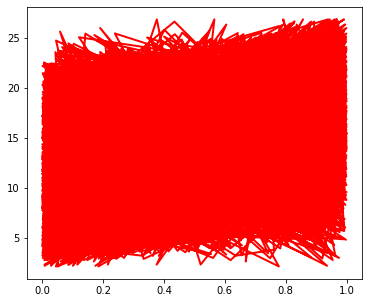

In [342]:
for grau in [1,2,20,300]:  
    
    print("grau: ", grau)
    
    polyfit = polyFit(X, y, grau)
    
    ypoly = polyfit.predict(X)
    
    plt.figure(figsize=[6,5])
    plt.plot(X, ypoly, label=str(grau), lw=2, c = 'red')
    plt.scatter(X, y[:10000,:6], c = "blue")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print("RMSE:")
    print(np.sqrt(np.mean(np.square(y - polyfit.predict(X)))))
    print("------------------------------------------------\n\n")

In [341]:
x.shape, y.shape

((10000, 6), (10000,))

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    

__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [ ]:
def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [ ]:
def logLossCost(ytrue, ypred_probs):
    return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [ ]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [ ]:
class regLog():

    
    def __init__(self, learning_rate, num_steps,limiar):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar=limiar
        
    def fit(self, X, y):
      y=y.reshape(-1,1)
      m=X.shape[0]
      k=X.shape[1]
      X_b=np.c_[np.ones((m,1)),X]
      theta=np.random.randn(k+1,1)
      for step in range(self.num_steps):
        yscore=sigmoid(X_b.dot(theta))
        gradient=X_b.T.dot(yscore-y)
        theta=theta-self.learning_rate*gradient
      self.theta_final=theta  


    
     


        
    def predict_proba(self, X):
      m=X.shape[0]
      x_b=np.c_[np.ones((m,1)),X] 

      probs = sigmoid(x_b.dot(self.theta_final))
      
      return probs.reshape(-1,)

    def predict(self,X):
      m=X.shape[0]
      x_b=np.c_[np.ones((m,1)),X] 

      probs = sigmoid(x_b.dot(self.theta_final))
      ypred= np.where(probs>self.limiar,1,0)
      return ypred


In [ ]:
x1,y1=getData2()

In [ ]:
rl=regLog(0.01,1000,0.5)

In [ ]:
rl.fit(x1,y1)

In [ ]:
rl.predict_proba(x1)

In [ ]:
ypred=rl.predict(x1)

In [ ]:
from  sklearn.metrics import confusion_matrix

In [ ]:
ypred=np.where(rl.predict_proba(x1)>0.5,1,0)
cf=confusion_matrix(y1,ypred)

In [ ]:
print(cf)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logi=LogisticRegression()

In [ ]:
logi.fit(x1,y1)

In [ ]:
y12=logi.predict(x1)

In [ ]:
cf1=confusion_matrix(y1,y12)

In [ ]:
print(cf1)

## Com a análise acima pude verificar a proxi, idade entre os valores da confusion matrix do modelo criado e do modelo de regressão do sk learn, o que mostra que o modelo trabalhou bem

In [ ]:
def func(x,y,v1,v2):
  lng_rate=[0.001,0.01,0.1,1]
  for l in lng_rate:
    reglog=regLog(l,v1,v2)
    reglog.fit(x,y)
    ypred=reglog.predict(x)
    cf=confusion_matrix(y,ypred)
    print(" Matriz de confusão para uma taxa de aprendizado de :",l )
  
    print(cf)
    print()

## testando os  dados variando a learnig rate

In [ ]:
func(x1,y1,1000,0.5)

## Com a análise acima pude verificar qua a taxa de aprendizado de 0.1 se comportou melhor nos dados, por isso utlizarei ela na variação do numero de passos abaixo

In [ ]:
def func1(x,y,v1,v2):
  num_steps=[100,500,1000,2000]
  for l in num_steps:
    reglog=regLog(v1,l,v2)
    reglog.fit(x,y)
    ypred=reglog.predict(x)
    cf=confusion_matrix(y,ypred)
    print(" Matriz de confusão para um número de passos de  :",l )
  
    print(cf)
    print()

In [ ]:
func1(x1,y1,0.1,0.5)

## Após os testes pude verificar que com a taxa de 0.1 e número de passos = 1000 , apresentaram os melhores resultados.